In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_data.csv")

# Attribute List

ID - Integer unique id of each movie

Belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format.

Budget:Budget of a movie in dollars. 0 values mean unknown.

Genres : Contains all the Genres Name & TMDB Id in JSON Format

Homepage - Contains the official homepage URL of a movie.

Imdb_id - IMDB id of a movie (string).

Original_language - Two digit code of the original language, in which the movie was made.

Original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.

Overview - Brief description of the movie.

Popularity - Popularity of the movie in float.

Poster_path - Poster path of a movie.

Production_companies - All production company name and TMDB id in JSON format of a movie.

Production_countries - Two digit code and full name of the production company in JSON format.

Release_date - Release date of a movie in mm/dd/yy format.

Runtime - Total runtime of a movie in minutes (Integer).

Spoken_languages - Two digit code and full name of the spoken language.

Status - Is the movie released or rumored?

Tagline - Tagline of a movie

Title - English title of a movie

Keywords - TMDB Id and name of all the keywords in JSON format.

Cast - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

Crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

Revenue - Total revenue earned by a movie in dollars.

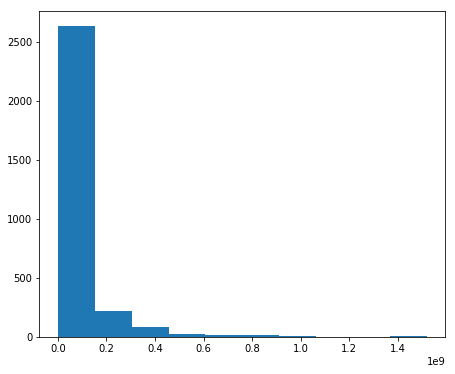

In [3]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2,1)
plt.hist(df['revenue']);

from the histogram representation we can see the data is skewed

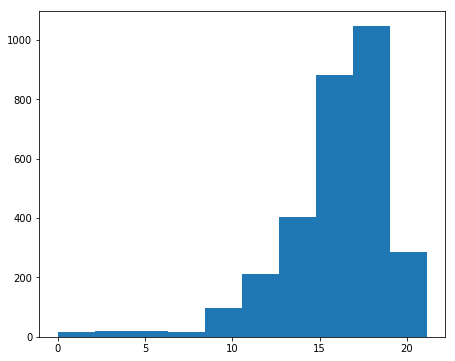

In [4]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2,1)
plt.hist(np.log(df['revenue']));

to remove skewness we use the log function

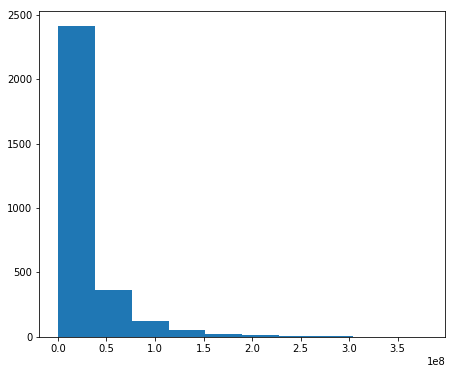

In [5]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2,1)
plt.hist(df['budget']);

The budget column also seems skewed

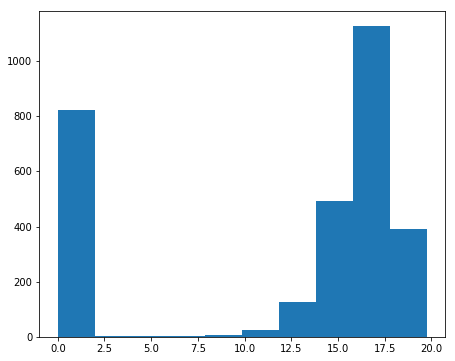

In [6]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2,1)
plt.hist(np.log1p(df['budget']));

In [7]:
df['log_budget'] = np.log1p(df['budget'])
df = df.drop('budget',axis=1)

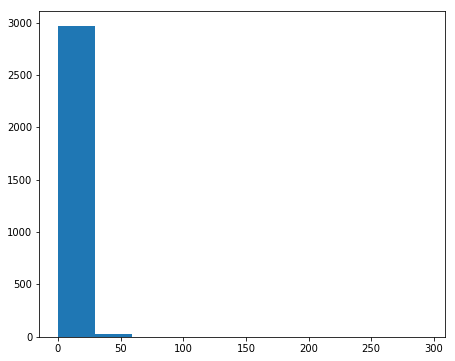

In [8]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2,1)
plt.hist(df['popularity']);

Popularity column seems skewed

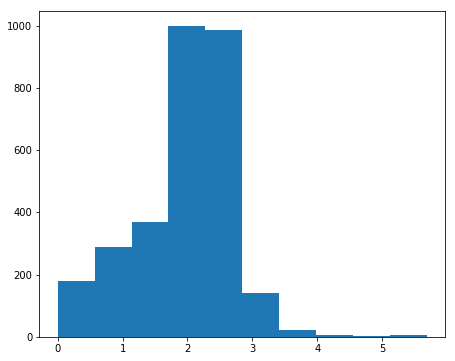

In [9]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2,1)
plt.hist(np.log1p(df['popularity']));

In [93]:
df['popularity'] = np.log1p(df['popularity'])

log of popularity

In [10]:
def f1(x):
    if x is not np.NaN:
        return 1
    else:
        return 0
df['has_homepage'] = df['homepage'].apply(f1)

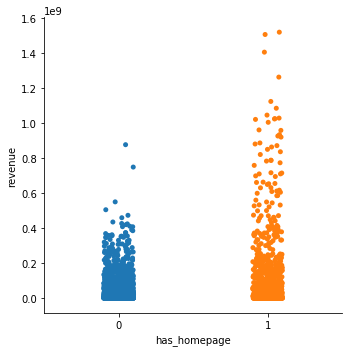

In [11]:
sns.catplot(x='has_homepage', y='revenue', data=df)

Revenue for movies with homepage has higher revenue

In [12]:
df[['release_month','release_day','release_year']]=df['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)

In [13]:
df.loc[ (df['release_year'] <= 19) & (df['release_year'] < 100), "release_year"] += 2000
df.loc[ (df['release_year'] > 19)  & (df['release_year'] < 100), "release_year"] += 1900

In [14]:
release_date = pd.to_datetime(df['release_date']) 
df['release_day_of_week'] = release_date.dt.dayofweek
df['release_quarter'] = release_date.dt.quarter

In [15]:
df[['release_month','release_day','release_year','release_quarter','release_day_of_week']]

,release_month,release_day,release_year,release_quarter,release_day_of_week
0,2,20,2015,1,4
1,8,6,2004,3,4
2,10,10,2014,4,4
3,3,9,2012,1,4
4,2,5,2009,1,3
5,8,6,1987,3,3
6,8,30,2012,3,3
7,1,15,2004,1,3
8,2,16,1996,1,4
9,4,16,2003,2,2


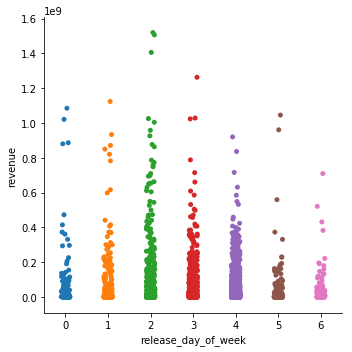

In [16]:
sns.catplot(x='release_day_of_week', y='revenue', data=df)

revenues are low on for movies released on monday,sunday and high for movies released on wednesday and thursday

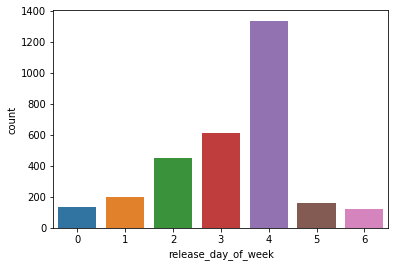

In [17]:
sns.countplot(x='release_day_of_week', data=df)

Most number of movies are released on friday

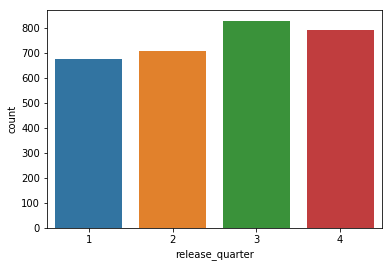

In [18]:
sns.countplot(df['release_quarter'].sort_values())

A lot of movies are released in 3rd and 4th quater.

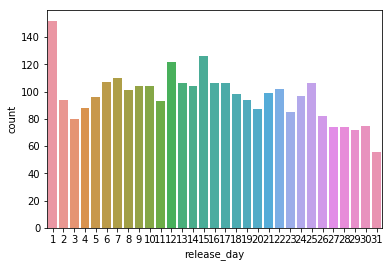

In [19]:
sns.countplot(df['release_day'].sort_values())

There's a lot of movies that are releaed on the 1st of the month

# Model training

In [20]:
df = df.drop(['homepage', 'imdb_id', 'poster_path', 'release_date', 'status'], axis=1)

In [27]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [36]:
for col in ['original_language', 'collection_name', 'genre_list']:
    le = LabelEncoder()
    le.fit(list(df[col].fillna('')))
    df[col] = le.fit_transform(df[col].fillna('').astype(str))


In [37]:
for col in ['title', 'tagline', 'overview', 'original_title']:
    df['len_' + col] = df[col].fillna('').apply(lambda x: len(str(x)))
    df['words_' + col] = df[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    df = df.drop(col, axis=1)

In [24]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(col)
        df = df.drop([col], axis=1)

language_
cast_character_


In [39]:
k = 10
fold = list(KFold(k, shuffle = True).split(df))

In [85]:
import xgboost as xgb
import pickle

In [82]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'reg:tweedie',
         'max_depth': 5,
         'learning_rate': 0.01,
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "lambda_l1": 0.2,
         "verbosity": 1}

In [68]:
def rmsle(predictions, dmat):
    labels = dmat.get_label()
    diffs = np.log(predictions + 1) - np.log(labels + 1)
    squared_diffs = np.square(diffs)
    avg = np.mean(squared_diffs)
    return ('RMSLE', np.sqrt(avg))

In [89]:
def xgb_model(X_train, train_y, X_val, val_y, params) :
    train_data = xgb.DMatrix(data=X_train, label=train_y)
    valid_data = xgb.DMatrix(data=X_val, label=val_y)

    watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
    model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, feval=rmsle,early_stopping_rounds=200, verbose_eval=500, params=params)
    y_pred_valid = model.predict(xgb.DMatrix(X_val), ntree_limit=model.best_ntree_limit)
    return model

In [94]:
X = df.drop(['id', 'revenue'], axis=1)

y = np.log1p(df['revenue'])


In [96]:
for i, (trn, val) in enumerate(fold) :
    print(i+1, "fold")
    
    train_x = X.loc[trn, :]
    train_y = y[trn]
    val_x = X.loc[val, :]
    val_y = y[val]
    model = xgb_model(train_x, train_y, val_x, val_y, params)
    print("Saving Model...")
    pickle.dump(model, open("xgboost.model", "wb"))
print("dumping column names")    
pickle.dump(df.columns, open("columns.column", "wb"))

1 fold
[0]	train-tweedie-nloglik@1.5:46.1857	valid_data-tweedie-nloglik@1.5:45.8565	train-RMSLE:2.40901	valid_data-RMSLE:2.39944
Multiple eval metrics have been passed: 'valid_data-RMSLE' will be used for early stopping.

Will train until valid_data-RMSLE hasn't improved in 200 rounds.


/home/anvesh/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[500]	train-tweedie-nloglik@1.5:15.9184	valid_data-tweedie-nloglik@1.5:15.894	train-RMSLE:0.129864	valid_data-RMSLE:0.249388
Stopping. Best iteration:
[628]	train-tweedie-nloglik@1.5:15.9131	valid_data-tweedie-nloglik@1.5:15.8912	train-RMSLE:0.119972	valid_data-RMSLE:0.24868

Saving Model...
2 fold
[0]	train-tweedie-nloglik@1.5:46.0873	valid_data-tweedie-nloglik@1.5:46.7428	train-RMSLE:2.40648	valid_data-RMSLE:2.42218
Multiple eval metrics have been passed: 'valid_data-RMSLE' will be used for early stopping.

Will train until valid_data-RMSLE hasn't improved in 200 rounds.
[500]	train-tweedie-nloglik@1.5:15.8982	valid_data-tweedie-nloglik@1.5:16.0754	train-RMSLE:0.137037	valid_data-RMSLE:0.19805
Stopping. Best iteration:
[632]	train-tweedie-nloglik@1.5:15.8921	valid_data-tweedie-nloglik@1.5:16.0731	train-RMSLE:0.125325	valid_data-RMSLE:0.196742

Saving Model...
3 fold
[0]	train-tweedie-nloglik@1.5:46.1382	valid_data-tweedie-nloglik@1.5:46.2839	train-RMSLE:2.40773	valid_data-RMSLE:2.411